# Validation of Bolivia model

This notebooks investigates the results obtained by pypsa-earth model for the Bolivia case.
In particular, public information of the power system of Bolivia are compared to those used and obtained from the pypsa-earth model.

The following quantities will be reviewed:
- inputs used by the pypsa-model:
  - network characteristics
  - substations
  - installed generation by type
- outputs of the simulation
  - demand
  - energy production shares

To properly reproduce the findings obtained in this notebook, please run the full snakemake procedure on the Nigeria case only.
To do so, please set ``countries = ["BO"]`` in the ``config.yaml`` file.

## Preparation

### Set main directory to root folder

In [43]:
# change current directory to parent folder
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")

from scripts._helpers import three_2_two_digits_country

### Definition of main folder paths

In [44]:
import os

scenario_name = ""  # scenario name, default value is "" for tutorial or default configuration
                    # value shall be non null if a scenario name is specified under the "run" tag in the config file

scenario_subpath = scenario_name + "/" if scenario_name else ""

# OSM raw data files
substations_OSMraw_path = (
    "/users/marih/test4/pypsa-earth/resources/" + scenario_subpath + "osm/raw/all_raw_substations.geojson"
)
lines_OSMraw_path = "/users/marih/test4/pypsa-earth/resources/" + scenario_subpath + "osm/raw/all_raw_lines.geojson"

# cleaned osm data files
substations_OSMclean_path = (
    "/users/marih/test4/pypsa-earth/resources/" + scenario_subpath + "osm/clean/all_clean_substations.geojson"
)
lines_OSMclean_path = "/users/marih/test4/pypsa-earth/resources/" + scenario_subpath + "osm/clean/all_clean_lines.geojson"

# shapes files
countries_shape_path = "/users/marih/test4/pypsa-earth/resources/" + scenario_subpath + "shapes/country_shapes.geojson"

# solve network output
solved_network_path = "/users/marih/test4/pypsa-earth/results/" + scenario_subpath + "networks/elec_s_4_ec_lcopt_Co2L-1H.nc"

elec_s4 = "/users/marih/test4/pypsa-earth/" + scenario_subpath + "networks/elec_s_4.nc"

elec_s4_ec = "/users/marih/test4/pypsa-earth/" + scenario_subpath + "networks/elec_s_4_ec.nc"

elec_s = "/users/marih/test4/pypsa-earth/" + scenario_subpath + "networks/elec_s.nc"



In [45]:
# import packages

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature

from scipy.sparse import csgraph
from itertools import product
import re

from shapely.geometry import Point, LineString
import shapely, shapely.prepared
from shapely.wkt import loads
from shapely.validation import make_valid

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

(<matplotlib.collections.PatchCollection at 0x20f1bb68070>,
 <matplotlib.collections.LineCollection at 0x20f1bc2a1d0>)

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


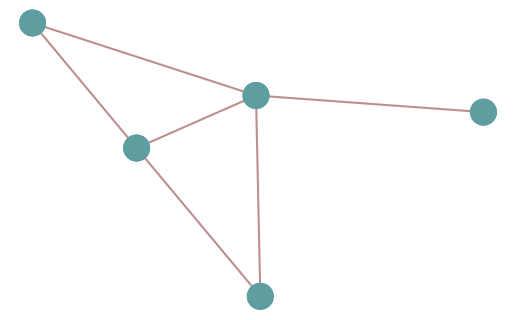

In [49]:
base = "/users/marih/test4/pypsa-earth/results/networks/elec_s_5_ec_lcopt_Co2L-1H.nc"

n_base = pypsa.Network(base)
n_base.plot()

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

(<matplotlib.collections.PatchCollection at 0x20f1bc15720>,
 <matplotlib.collections.LineCollection at 0x20f1bbc90f0>)

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


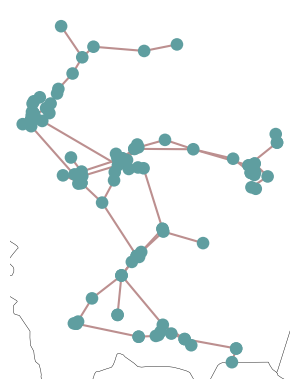

In [48]:
import os
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import sys
import pandas as pd
from zipfile import ZipFile
import sys



solved_network = "C:/Users/marih/test4/pypsa-earth/networks/base.nc"
n_solve = pypsa.Network(solved_network)
n = n_solve
n.plot()

In [ ]:
import folium
import json
import webbrowser

# Load your GeoJSON data
line_path = 'C:/Users/marih/test4/pypsa-earth/resources/osm/clean/all_clean_lines.geojson'
substation_path = 'C:/Users/marih/test4/pypsa-earth/resources/osm/clean/all_clean_substations.geojson'

with open(line_path) as f1:
    geojson_data_1 = json.load(f1)

with open(substation_path) as f2:
    geojson_data_2 = json.load(f2)

# Create a map object (set the latitude and longitude to center the map)
m = folium.Map(location=[-16.2861, -67.835], zoom_start=13)

# Add enhanced popups for lines
folium.GeoJson(
    geojson_data_1,
    name='Layer 1',
    popup=folium.GeoJsonPopup(fields=['line_id', 'length', 'voltage', 'circuits'])
).add_to(m)

# Add enhanced popups for substations
folium.GeoJson(
    geojson_data_2,
    name='Layer 2',
    popup=folium.GeoJsonPopup(fields=['bus_id', 'voltage', "lon", "lat"])
).add_to(m)

# Add a layer control to toggle layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file and open in the browser
m.save('C:/Users/marih/test4/pypsa-earth/map.html')
webbrowser.open_new_tab('C:/Users/marih/test4/pypsa-earth/map.html')


In [ ]:
import folium
import json
import webbrowser

# Load your GeoJSON data
line_path = 'C:/Users/marih/test4/pypsa-earth/resources/osm/clean/all_clean_lines.geojson'
substation_path = 'C:/Users/marih/test4/pypsa-earth/resources/osm/clean/all_clean_substations.geojson'

with open(line_path) as f1:
    geojson_data_1 = json.load(f1)

with open(substation_path) as f2:
    geojson_data_2 = json.load(f2)

# Create a map object (set the latitude and longitude to center the map)
m = folium.Map(location=[-16.2861, -67.835], zoom_start=13)

# Add a basic popup for lines
folium.GeoJson(
    geojson_data_1,
    name='Layer 1',
    popup=folium.GeoJsonPopup(fields=['line_id'])
).add_to(m)

# Add a basic popup for substations
folium.GeoJson(
    geojson_data_2,
    name='Layer 2',
    popup=folium.GeoJsonPopup(fields=['bus_id'])
).add_to(m)

# Add a layer control to toggle layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file and open in the browser
m.save('C:/Users/marih/test4/pypsa-earth/map.html')
webbrowser.open_new_tab('C:/Users/marih/test4/pypsa-earth/map.html')


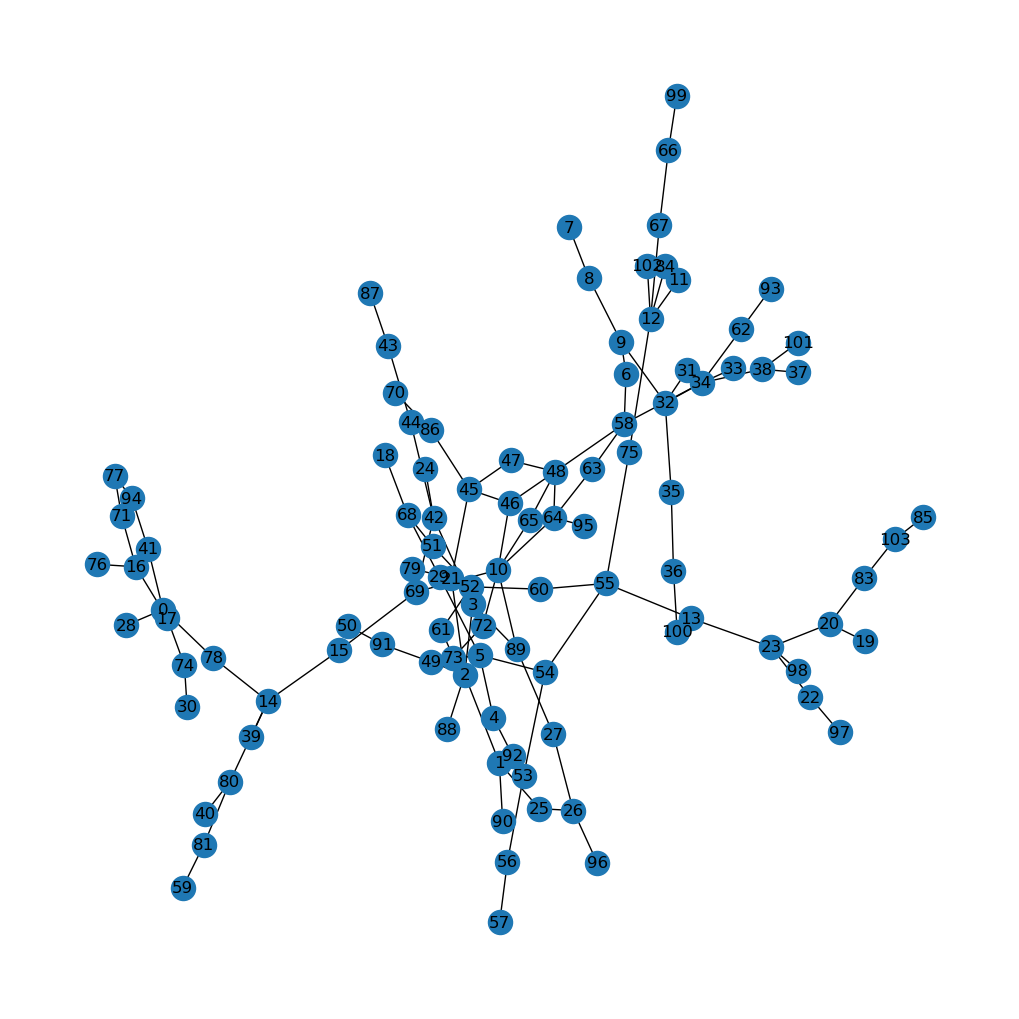

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
 
G = nx.Graph()
 
df_buses = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_buses_build_network.csv")
 
df_lines = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_lines_build_network.csv")

df_transformers = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_transformers_build_network.csv")
 
options = {
    'node_color': 'black',
    'node_size': 2,
    'width': 3,
}
 
df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]
df3 = df_transformers[["bus0", "bus1"]]

df4 = pd.concat([df1, df3])
 
G = nx.from_pandas_edgelist(df4, 'bus0', 'bus1')
 
pos = nx.spring_layout(G, scale=2, seed=84)
 
for i in range(len(df_buses)):
    pos[i] = [df_buses.lon[i], df_buses.lat[i]]
 
 
 
pos = nx.shell_layout(G)
 
plt.figure(figsize=(10, 10))
fig1 = nx.draw(G, with_labels=True)

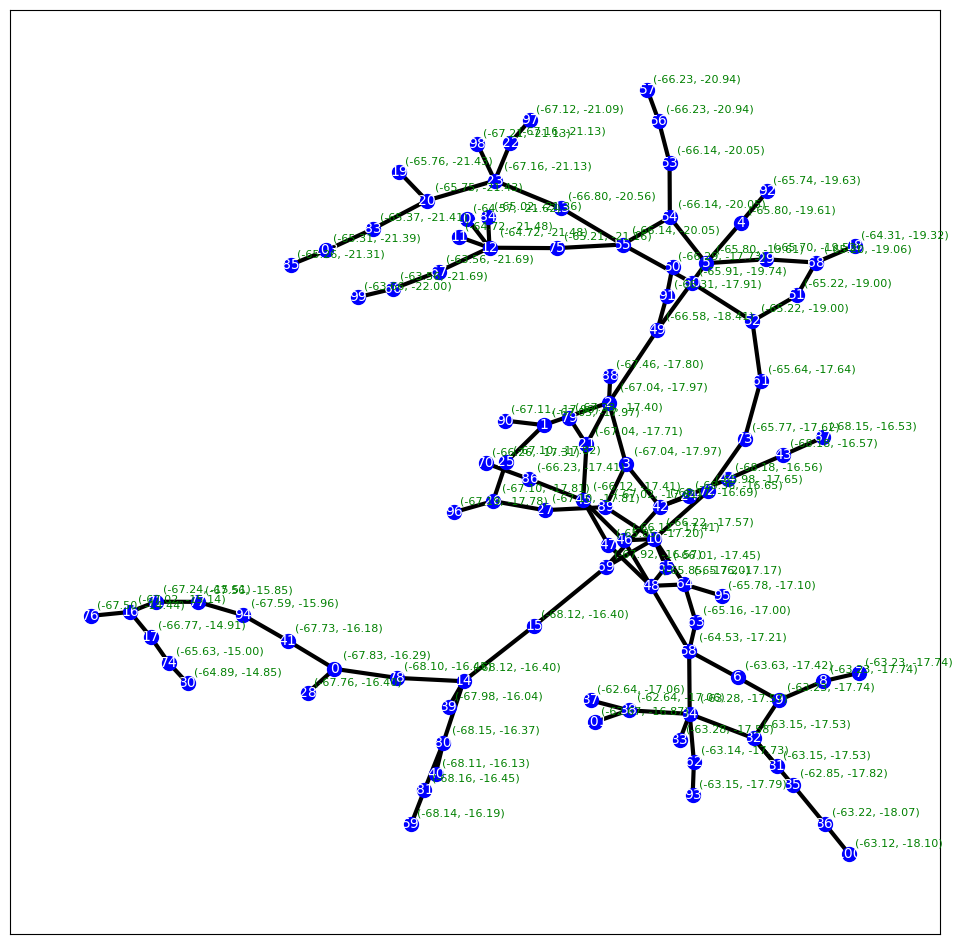

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()

df_buses = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_buses_build_network.csv")
df_lines = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_lines_build_network.csv")
df_transformers = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_transformers_build_network.csv")

df1 = df_lines[["bus0", "bus1"]]
df2 = df_buses[["lon", "lat"]]
df3 = df_transformers[["bus0", "bus1"]]

df4 = pd.concat([df1, df3])

G = nx.from_pandas_edgelist(df4, 'bus0', 'bus1')

pos = nx.spring_layout(G, scale=2, seed=84)

plt.figure(figsize=(12, 12))

# Draw the main graph
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue')

# Draw isolated clusters in a different color
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=isolated_nodes, node_size=100, node_color='red')

# Draw edges
nx.draw_networkx_edges(G, pos, width=3)

# Add labels with indices inside the nodes
for node, (x, y) in pos.items():
    plt.text(x, y, s=node, horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Add labels with coordinates next to the nodes
for node, (x, y) in pos.items():
    coord_text = f'({df_buses.loc[node, "lon"]:.2f}, {df_buses.loc[node, "lat"]:.2f})'
    degree = G.degree[node]
    offset_x = 0.02 + 0.005 * degree
    offset_y = 0.02 + 0.005 * degree
    plt.text(x + offset_x, y + offset_y, s=coord_text, horizontalalignment='left', verticalalignment='bottom', fontsize=8, color='green')

plt.show()


KeyError: 82

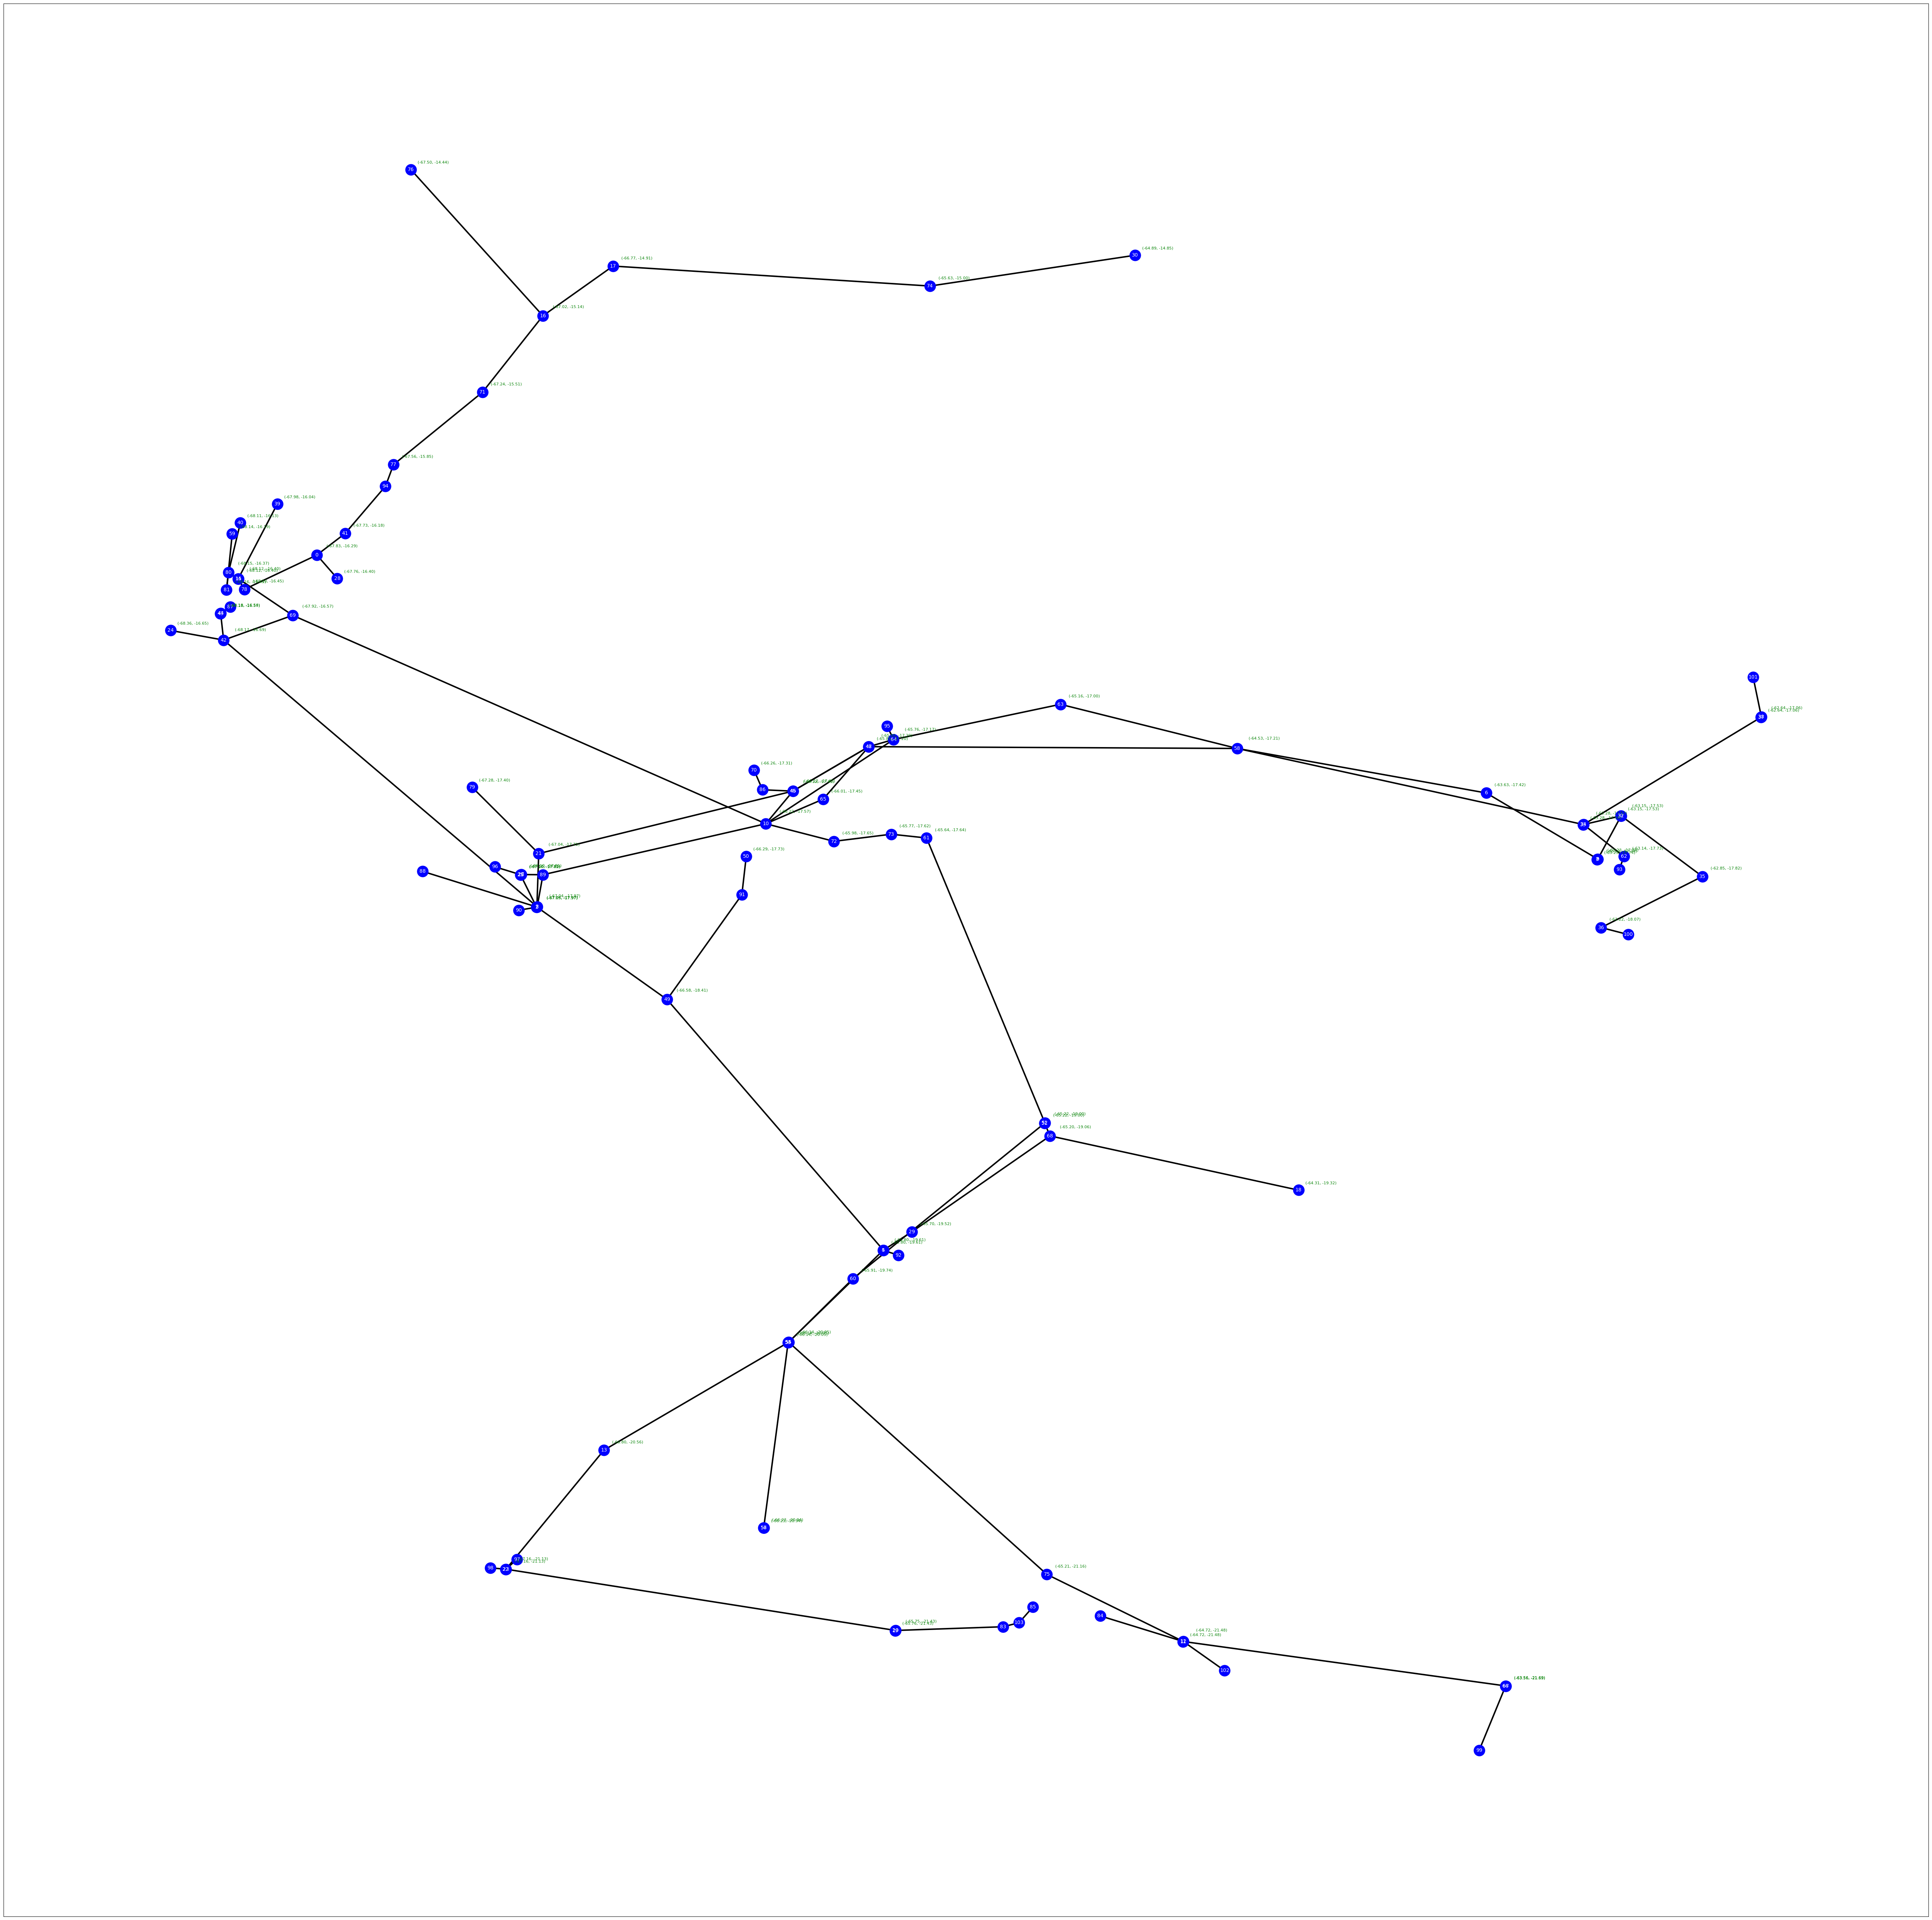

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = nx.Graph()

# Read the CSV files
df_buses = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_buses_build_network.csv")
df_lines = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_lines_build_network.csv")
df_transformers = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_transformers_build_network.csv")

# Combine dataframes
df1 = df_lines[["bus0", "bus1"]]
df3 = df_transformers[["bus0", "bus1"]]
df4 = pd.concat([df1, df3])

# Create graph from edge list
G = nx.from_pandas_edgelist(df4, 'bus0', 'bus1')

# Create a position dictionary based on coordinates
pos = {node: (row['lon'], row['lat']) for node, row in df_buses.iterrows()}

plt.figure(figsize=(70, 70))

# Draw the main graph
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='blue')

# Draw isolated clusters in a different color
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=isolated_nodes, node_size=500, node_color='red')

# Draw edges
nx.draw_networkx_edges(G, pos, width=3)

# Add labels with indices inside the nodes
for node, (x, y) in pos.items():
    plt.text(x, y, s=node, horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Add labels with coordinates next to the nodes
for node, (x, y) in pos.items():
    coord_text = f'({x:.2f}, {y:.2f})'
    degree = G.degree[node]
    offset_x = 0.02 + 0.005 * degree
    offset_y = 0.02 + 0.005 * degree
    plt.text(x + offset_x, y + offset_y, s=coord_text, horizontalalignment='left', verticalalignment='bottom', fontsize=8, color='green')

plt.show()


In [5]:
import pandas as pd
line_data = pd.read_csv("C:/users/marih/test4/pypsa-earth/resources/base_network/all_lines_build_network.csv")

### Prediction of line lengths

The predictions of the lengths of the missing lines are made solely on the distance between the coordinates of the buses they are connected to. The calculation and results are shown below. 

In [6]:
from geopy.distance import geodesic

def calculate_line_length(bus_data, bus_id1, bus_id2):
    """
    Calculate the straight line distance between two buses based on their coordinates,
    specifically identifying the row where bus_id1 is in "bus0" and bus_id2 is in "bus1" or vice versa.

    :param bus_data: DataFrame containing bus information.
    :param bus_id1: ID of the first bus.
    :param bus_id2: ID of the second bus.
    :return: The straight line distance between the two buses.
    """
    # Find the row where bus_id1 is in 'bus0' and bus_id2 is in 'bus1' or vice versa
    specific_row = bus_data[((bus_data['bus0'] == bus_id1) & (bus_data['bus1'] == bus_id2)) |
                            ((bus_data['bus0'] == bus_id2) & (bus_data['bus1'] == bus_id1))]

    if specific_row.empty:
        raise ValueError(f"No line found connecting Bus ID {bus_id1} and Bus ID {bus_id2}.")

    # Extract coordinates
    specific_row = specific_row.iloc[0]
    coors1 = (specific_row['bus0_lat'], specific_row['bus0_lon']) if specific_row['bus0'] == bus_id1 else (specific_row['bus1_lat'], specific_row['bus1_lon'])
    coors2 = (specific_row['bus0_lat'], specific_row['bus0_lon']) if specific_row['bus0'] == bus_id2 else (specific_row['bus1_lat'], specific_row['bus1_lon'])

    # Calculate the straight line distance
    distance = geodesic(coors1, coors2).meters

    return distance, coors1, coors2, specific_row['line_id'], bus_id1, bus_id2

distance, coors1, coors2, line_id, bus_id1, bus_id2 = calculate_line_length(line_data, 80, 14)
print(f"Line {line_id} between bus {bus_id1} {coors1} and bus {bus_id2} {coors2} has length {distance:.2f} meters.")

distance, coors1, coors2, line_id, bus_id1, bus_id2 = calculate_line_length(line_data, 45, 86)
print(f"Line {line_id} between bus {bus_id1} {coors1} and bus {bus_id2} {coors2} has length {distance:.2f} meters.")

distance, coors1, coors2, line_id, bus_id1, bus_id2 = calculate_line_length(line_data, 94, 41)
print(f"Line {line_id} between bus {bus_id1} {coors1} and bus {bus_id2} {coors2} has length {distance:.2f} meters.")

distance, coors1, coors2, line_id, bus_id1, bus_id2 = calculate_line_length(line_data, 83, 103)
print(f"Line {line_id} between bus {bus_id1} {coors1} and bus {bus_id2} {coors2} has length {distance:.2f} meters.")

distance, coors1, coors2, line_id, bus_id1, bus_id2 = calculate_line_length(line_data, 82, 87)
print(f"Line {line_id} between bus {bus_id1} {coors1} and bus {bus_id2} {coors2} has length {distance:.2f} meters.")


Line 1017603091_0 between bus 80 (-16.3698, -68.1528) and bus 14 (-16.4003, -68.118) has length 5021.20 meters.
Line 2067603091_0 between bus 45 (-17.4145, -66.1237) and bus 86 (-17.408, -66.2329) has length 11624.87 meters.
Line 2167603091_0 between bus 94 (-15.9571, -67.5883) and bus 41 (-16.1831, -67.7335) has length 29441.76 meters.
Line 2267603091_0 between bus 83 (-21.408, -65.3677) and bus 103 (-21.3888, -65.3106) has length 6290.89 meters.
Line 2367603091_0 between bus 82 (-16.5278, -68.0915) and bus 87 (-16.5335, -68.1467) has length 5926.12 meters.


After the calculations above, the new lengths are added to the csv-file.

### Import packages

In [ ]:
# import packages

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature

from scipy.sparse import csgraph
from itertools import product
import re

from shapely.geometry import Point, LineString
import shapely, shapely.prepared
from shapely.wkt import loads
from shapely.validation import make_valid

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

In [ ]:
elec_s4_network = pypsa.Network(elec_s4)
elec_s4_ec_network = pypsa.Network(elec_s4_ec)

elec_s_network = pypsa.Network(elec_s)

In [ ]:
elec_s4_network.plot()

In [ ]:
elec_s4_ec_network.plot()

In [ ]:
elec_s_network.plot()

## 1. Analysis of network of the Bolivian case

In this subsection, the data publicy on the network power system are compared. In particular, the main data that are being compared are:
- Layout of the network as shown by images (Section 1.1)
- Total length of the line (Section 1.2)

The data used for the comparison have been taken from public reliable sources, with strong focus on the website of the Nigerian Transmission operator: Nigerian Transmission Company ([TCN](https://www.tcn.org.ng/)).

In the Section 1.1, the network layout obtained by the workflow is drawn to be possibly compared with the image as shown in the public website of the [Nigerian Transmission System Operator](https://www.tcn.org.ng/). The image below, dated 2016, available from the [Nigerian Transmission System Operator](https://www.tcn.org.ng/), depicts the national power grid of Nigeria.

![Nigerian transmission system](../images/Nigeria/Nigeria_network_map.png)
[Source link](https://www.tcn.org.ng/repository/maps/GRID%20MAP%20FOR%20EXISTING%20TRANSMISSION%20AND%20GENERATION%20NETWORK.pdf)

In the Section 1.2, the network length as obtained from the workflow is calculated to then be compared with the information reported by the Nigerian TSO. According to the data available from the [Transmission Company of Nigeria (ISO)](https://nerc.gov.ng/index.php/home/nesi/404-transmission), in Nigeria, there are:

- \> 20000km lines
- \> 7500MW line capacity

These information shall be close to those obtained by the workflow.

### 1.1. Network layout (using OSM clean data)

In this section, the cleaned OSM data are used to draw plots of the entire network, to reproduce the image available from the Nigerian TSO and verify the quality of the pypsa-earth model.

#### 1.1.1. Load clean OSM data

In [ ]:
# load substation geodataframe
df_substations_osm_clean = gpd.read_file(
    substations_OSMclean_path
)  # .to_crs(epsg=3857)
# df_substations_osm_clean = df_substations_osm_clean[
#     df_substations_osm_clean.country == "NG"
# ]
df_substations_osm_clean["geometry"] = df_substations_osm_clean["geometry"].apply(
    make_valid
)
# load lines geodataframe
df_lines_osm_clean = gpd.read_file(lines_OSMclean_path)  # .to_crs(epsg=3857)
# df_lines_osm_clean = df_lines_osm_clean[df_lines_osm_clean.country == "NG"]
df_lines_osm_clean["geometry"] = df_lines_osm_clean["geometry"].apply(make_valid)

#### 1.1.2. Calculate voltage levels for substations and lines

Substations voltage level [V]

In [ ]:
voltage_substations = df_substations_osm_clean.voltage.unique()
voltage_substations.sort()
voltage_substations

Lines voltage level [V]

In [ ]:
unique_voltages = df_lines_osm_clean.voltage.unique()
unique_voltages.sort()
unique_voltages

#### 1.1.3. Specify colors for voltage levels in agreement with the image by the TSO

Specify color array by voltage level

In [ ]:
color_voltages = ["orange", "blue", "red", "green"]

voltage_to_color = {v: c for (v, c) in zip(unique_voltages, color_voltages)}
voltage_to_color

#### 1.1.4. Plot the network data

Get the borders of the country shape to perform the desired plot

In [ ]:
# get all country shapes
country_shapes = gpd.read_file(countries_shape_path)

# get bolivia shape
df_geometry = country_shapes.set_index("name").geometry

# get bounds
# print("Original bounds:")
# print(df_geometry.boundary.bounds)

# add tolerance to bounds
tol = 0.2

bounds_mod = df_geometry.boundary.bounds
bounds_mod["minx"] -= tol  # reduce minx
bounds_mod["miny"] -= tol  # reduce miny
bounds_mod["maxx"] += tol  # increase maxx
bounds_mod["maxy"] += tol  # increase maxy

print("Modified bounds:")
print(bounds_mod)

# reorder bounds to comply with extend function (x0, x1, y0, y1)
extent_list = list(bounds_mod[["minx", "maxx", "miny", "maxy"]].loc["BO"])

Draw the picture using pyplot

In [ ]:
%matplotlib inline

# get the structure of the background data to plot
imagery = OSM()

max_width = 30  # max width of the figure
max_height = 30  # max heifht of the figure

# calculate figure size with appropriate multiplier to adhere to the desired width/height
multiplier = min(
    max_width / (extent_list[1] - extent_list[0]),
    max_height / (extent_list[3] - extent_list[2]),
)
figsize = (
    (extent_list[1] - extent_list[0]) * multiplier,
    (extent_list[3] - extent_list[2]) * multiplier,
)


fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)  # specify projection
ax.set_extent(extent_list, ccrs.PlateCarree())  # specify the location of the image
ax.add_image(imagery, 7)  # add the background image

# create an auxiliary dataframe for the substations with the desired crs and color properties
df_substations_osm_clean_plot = df_substations_osm_clean.to_crs(imagery.crs)
# specify the color of the nodes
df_substations_osm_clean_plot["color"] = df_substations_osm_clean_plot.voltage.apply(
    lambda x: voltage_to_color[x]
)


# create an auxiliary dataframe for the lines with the desired crs and properties
df_lines_osm_clean_plot = df_lines_osm_clean.to_crs(imagery.crs)
df_lines_osm_clean_plot[
    "centroids"
] = df_lines_osm_clean_plot.geometry.boundary.centroid  # get the centroids of the line
df_lines_osm_clean_plot["color"] = df_lines_osm_clean_plot.voltage.apply(
    lambda x: voltage_to_color[x]
)  # specify the color of the line

# draw the substations
df_substations_osm_clean_plot.plot(color=df_substations_osm_clean_plot.color, ax=ax)

# draw the lines
df_lines_osm_clean_plot.plot(color=df_lines_osm_clean_plot.color, ax=ax)

# add annotations to show the number of circuits by line
for (id, row) in df_lines_osm_clean_plot.iterrows():
    ax.text(row.centroids.x, row.centroids.y, row.circuits, color=row.color)

Add the equivalent map but with interactive features

In [ ]:
# Disabled to ease the data storing in github; decomment to use

# df_substations_osm_clean[df_substations_osm_clean.voltage == unique_voltages[0]].hvplot(
#     geo=True,
#     size = 10,  # buses["tag_area"]**(0.5)/10,
#     frame_height=750,
#     alpha=0.4,
#     tiles='CartoLight',
#     color=color_voltages[0],
#     hover_cols=['bus_id'],
# ) * df_substations_osm_clean[df_substations_osm_clean.voltage == unique_voltages[1]].hvplot(
#     geo=True,
#     alpha=0.4,
#     color=color_voltages[1],
#     hover_cols=['bus_id'],
# ) * df_substations_osm_clean[df_substations_osm_clean.voltage == unique_voltages[2]].hvplot(
#     geo=True,
#     alpha=0.4,
#     color=color_voltages[2],
#     hover_cols=['bus_id'],
# ) * df_lines_osm_clean[df_lines_osm_clean.voltage == unique_voltages[0]].hvplot(
#     geo=True,
#     color=color_voltages[0],
#     alpha=0.4,
#     hover_cols=['circuits', 'line_id'],
# ) * df_lines_osm_clean[df_lines_osm_clean.voltage == unique_voltages[1]].hvplot(
#     geo=True,
#     color=color_voltages[1],
#     alpha=0.4,
#     hover_cols=['circuits', 'line_id'],
# ) * df_lines_osm_clean[df_lines_osm_clean.voltage == unique_voltages[2]].hvplot(
#     geo=True,
#     color=color_voltages[2],
#     alpha=0.4,
#     hover_cols=['circuits', 'line_id'],
# ).opts(
#     active_tools=['pan', 'wheel_zoom']
# )

#### 1.1.5. Comments on the network layout

By comparing the image of the existing lines availabe from TCN and the plots obtained from the workflow, it is possible to notice that they overlap and there are only minimal differences.

However, the available source is dated 2016 and, as stated by the same [TCN source](https://www.tcn.org.ng/repository/maps/GRID%20MAP%20FOR%20EXISTING%20TRANSMISSION%20AND%20GENERATION%20NETWORK.pdf), there where several transmission lines projects ongoing in 2015.
Therefore, the current model available in OSM may be sligthly outdated, but it draws a good picture of the current situation, given the available sources.

### 1.2. Calculate the total length of the lines

In this section, the total length of the lines are obtained. To do so, the following actions are performed:
1. Preliminary data loading
2. Crosscheck the unit of measurement to verify that the units are in meters [m]
3. Crosscheck the number of circuits for geometry line in the raw OSM dataset
4. Evaluate the total length of the lines in the raw OSM dataset
5. Evaluate the total length of the lines in the clean OSM dataset
6. Remarks on the line length

Note: the OSM dataset reports the geometry paths of the lines; however, in the same geometry path there may multiple circuits. That information is contained in the number of cables for geometry line, which is the reason why this information is properly addressed in point 3 (Subsection 1.2.3).

#### 1.2.1 Preliminary data loading of raw OSM data

In the following, we show the input data downloaded from OSM; the clean data have already been loaded.

In [ ]:
# load substation geodataframe
df_substations_osm_raw = gpd.read_file(substations_OSMraw_path)
# df_substations_osm_raw = df_substations_osm_raw[df_substations_osm_raw.Country == "BO"]
# load lines geodataframe
df_lines_osm_raw = gpd.read_file(lines_OSMraw_path)
# df_lines_osm_raw = df_lines_osm_raw[df_lines_osm_raw.Country == "BO"]

# note that epsg=3857 has been chosen so that lenghts are in meters

#### 1.2.2 Crosscheck the unit of measurement

In the following, we verify that the property ``geometry.length`` can be successfully used to measure the length of the line in meters (spoiler, it is). To do so, we need to use the crs ``EPSF:3763`` and compare the obtained value with the column ``Length`` available in the raw OSM data of dataframe ``df_lines_osm_raw``.

As shown below, the two informations are very close which confirm the proposed approach.

In [ ]:
df_lines_osm_raw["length_by_geometry"] = df_lines_osm_raw.to_crs(
    epsg=3857
).geometry.length
df_lines_osm_raw[["Length", "length_by_geometry"]].head()

#### 1.2.3 Verify the value of column ``tags.cables``

In the following we show the value of the dataframe column ``tags.cables`` to validate and verify the quality of the approximation used to estimate the total length.
This property describes the number of cables per geometric line, as reported in the OSM dataset and it is an important information to estimate the total length of the lines operated by each TSO.
In fact each geometric path may enable to carry multiple circuits, thus it is important to properly account to them when it occurs. Sicne three phase lines are mostly used, each circuit is composed by three cables.

In particular, we show that only integer and None values are available: by convention the None values will be changed to 3 as base-case scenario.

In [ ]:
df_lines_osm_raw["tags.cables"].unique()

#### 1.2.4. Calculate the total line length for OSM raw data

In this case, we calculate the total length of the lines.

Show line length by voltage level [km]

Note: when multiple circuits are available, the length of the line is multiplied accordingly.

In [ ]:
# Note, since CRS EPSG:3763 is used, distances are in meters, thus by dividing for 1000, the units are in km
df_lines_osm_raw["cables_fix"] = df_lines_osm_raw["tags.cables"].copy()
df_lines_osm_raw.loc[
    df_lines_osm_raw["tags.cables"].isnull() | df_lines_osm_raw["tags.cables"].isna(),
    "cables_fix",
] = 3  # when NaN or None, set default value
df_lines_osm_raw["length"] = (
    df_lines_osm_raw.to_crs(epsg=3857).geometry.length
    * df_lines_osm_raw["cables_fix"].astype(float)
    / 3
)
df_lines_osm_raw.groupby(by=["tags.voltage"]).length.sum() / 1000

Total lines length [km]

In [ ]:
df_lines_osm_raw.to_crs(epsg=3857).length.sum() / 1000

Furthermore, for the purpose of clarity, it is also shown the total length of the line where information on the number of circuits has been fixed (length of the lines where the cables data where missing)

Show total line length [km] for lines where information on the number of circuits is not available

In [ ]:
# Note, since CRS EPSG:3763 is used, distances are in meters, thus by dividing for 1000, the units are in km
df_lines_osm_raw.to_crs(epsg=3857)[
    df_lines_osm_raw["tags.cables"].isnull()
    | df_lines_osm_raw["tags.cables"].isna()  # when NaN or None, set default value
].geometry.length.sum() / 1000

#### 1.2.5. Calculate the total line length for OSM clean data

Finally, the information on total line length for the clean dataset are calculated.

Show line length by voltage level [km]

Note: when multiple circuits are available, the length of the line is multiplied accordingly.

In [ ]:
# Note, since CRS EPSG:3763 is used, distances are in meters, thus by dividing for 1000, the units are in km
df_lines_osm_clean["length"] = (
    df_lines_osm_clean.to_crs(epsg=3857).geometry.length
    * df_lines_osm_clean.circuits
    / 1000
)
df_lines_osm_clean.groupby(by=["voltage"]).length.sum()

Total lines length [km]

In [ ]:
df_lines_osm_clean.to_crs(epsg=3857).length.sum() / 1000

In [ ]:
df_lines_osm_clean["length"] = (
    df_lines_osm_clean.to_crs(epsg=3857).geometry.length
    * df_lines_osm_clean.circuits
    / 1000
)
df_lines_osm_clean.groupby(by=["voltage"]).length.sum()

#### 1.2.6. Remarks on the line length

According to the data available from the [Transmission Company of Nigeria (ISO)](https://nerc.gov.ng/index.php/home/nesi/404-transmission), in Nigeria, there are:

- \> 20000km lines
- \> 7500MW line capacity

Therefore, the current OSM data cleaning captures around 60% (12752/20000) the network length; yet, this value is pretty close to the input data available from OSM data.

The shape, however, is quire representative of the network shown in the image above. A big contribution to solve this element may be related to the number of circuits that may not be well corresponding to what actually in place. About 2800 km of geometric lines distances do not have the number of circuits specified.

Moreover, recent network upgrades may not be well represented.

## 2. Analysis on the demand data

In the following section, let's investigate the electrical demand used in the simulations.

According to [IEA](https://www.iea.org/articles/nigeria-energy-outlook), the electricity demand in Nigeria was about 57 TWh.

Let's verify the input used in pypsa-earth.

#### Load the model

In [ ]:
n_solve = pypsa.Network(solved_network_path)

#### Calculate total demand

Calculate the total demand used in the simulations.
Please, note that the actual demand shall be scaled to account for the number of representative days/periods that have been used.

In [ ]:
# filter only Bolivian demand
bolivia_demand = n_solve.loads_t.p.filter(regex="BO *", axis=1)

# raw sum used in the model
tot_yearly_demand_scaled = bolivia_demand.sum().sum()

# rescaled value accounting for the number of representative days: the factor (8760/bolivia_demand.shape[0]) is the multiplier
tot_yearly_demand = tot_yearly_demand_scaled * 8760 / bolivia_demand.shape[0]

# show value in TWh
print("Demand in TWh: %.2f" % (tot_yearly_demand / 1000000))

#### Comments on the demand

It is worth noticing that the expected demand is aligned to the current Nigerian electrical demand

## 3. Installed generation by type

In the subsequent section, the total installed generation is compared to validate the model.



In [ ]:
# filter only generators in Bolivia
bolivia_generators = n_solve.generators  # .filter(regex="BO *", axis=0)

# obtain installed generation by carrier
bolivia_generators.groupby(by="carrier")["p_nom"].sum()

In [ ]:
n_solve.plot()


## Checking the potentially isolated node 

In [ ]:
lines_BO = n_solve.lines
lines_BO

buses_BO = n_solve.buses    

bus_0 = lines_BO["bus0"].tolist()
bus_0_set = set(bus_0)
bus_1 = lines_BO["bus1"].tolist()
bus_1_set = set(bus_1)

buses_connected = bus_0_set.union(bus_1_set)

In [ ]:
new_bus_list = [bus for bus in bus_list if len(bus) <= 3]
new_bus_list

In [ ]:
#Checking which bus that is not connected to any line

difference = list(set(new_bus_list) - buses_connected)

print("Buses in Bolivia not connected to any line: ", difference)

In [ ]:
#Coordinates of the buses not connected to any line

x_pos = buses_BO[buses_BO.index.isin(difference)].x
y_pos = buses_BO[buses_BO.index.isin(difference)]['y']

plt.figure(figsize=(10,10))
n_solve.plot()
plt.scatter(x_pos, y_pos, color='red', s=2000)

plt.legend()
plt.show()

### Conclusion: The node is unfortunately isolated...

## 4. Energy production shares

In the following, the total energy production shares as output of the total energy dispatch as available by IEA are compared to those calculated by the pypsa-earth procedure.

The following image depicts the energy demand by source as computed in the Stated Policy Scenarios by [IEA](https://www.iea.org/articles/nigeria-energy-outlook), which is used as a reference for comparison purposes

![Nigerian demand - IEA](../images/Nigeria/Nigeria_demand.png)
[Source link](https://www.iea.org/articles/nigeria-energy-outlook)

In [ ]:
# filter only generators in Bolivia
bolivia_generators_dispatch = n_solve.generators_t.p.filter(regex="BO *", axis=1).copy()

# rename column to keep only the carrier
bolivia_generators_dispatch.rename(
    columns=dict(
        zip(
            bolivia_generators_dispatch.columns,
            map(
                lambda x: re.sub(r"BO \d+ ", "", x), bolivia_generators_dispatch.columns
            ),
        )
    ),
    inplace=True,
)

# obtain generation by carrier
(
    bolivia_generators_dispatch.groupby(level=0, axis=1).sum().sum()
    * 8760
    / bolivia_generators_dispatch.shape[0]
    / 1000000
).head(5)

In [ ]:
# create a dataframe with total generation per carrier

# create empty DataFrame with specific column names & types
df = pd.DataFrame(
    {
        "carrier": pd.Series(dtype="str"),
        "pypsa_total_generation [TWh]": pd.Series(dtype="float"),
    }
)

carrier_list = n_solve.generators.carrier.unique()

for i in range(0, len(carrier_list)):
    df.loc[i] = [
        carrier_list[i],
        round(
            n_solve.generators_t.p.filter(like=carrier_list[i], axis=1).sum().sum()
            / 1000000,
            2,
        ),
    ]  # MWh to TWh

df.loc[i + 1] = [
    "hydro",
    round(
        n_solve.storage_units_t.p.filter(like="hydro", axis=1).sum().sum() / 1000000, 2
    ),
]  # MWh to TWh

df.head(10)

In [ ]:
# import validation data form OurWorldInData

url = "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv"
df = pd.read_csv(url)
df = df.loc[
    :,
    [
        "iso_code",
        "country",
        "year",
        "coal_electricity",
        "gas_electricity",
        "nuclear_electricity",
        "hydro_electricity",
        "solar_electricity",
        "wind_electricity",
    ],
]
df = df[df["iso_code"].notna()]  # removes antartica
df["iso_code_2"] = df.loc[:, "iso_code"].apply(lambda x: three_2_two_digits_country(x))

In [ ]:
year_owid = 2021  # option
iso_country_code = "BO"
df = df[df["iso_code_2"] == iso_country_code]
df = df[df["year"] == year_owid]
df.head(2)  # in [TWh]

#### Comments
- Currently Oil (back-up generators) is not dispatched and numbers do not match
- hydro is basically missing

# 5. Validation compared to Xenia

In [ ]:
statistics_BO = n_solve.statistics()

In [ ]:
statistics_BO.reset_index(inplace=True)
installed_cap_BO = statistics_BO.loc[statistics_BO["level_0"].str.contains("Generator"), "Installed Capacity"].tolist()
generator_types_BO = statistics_BO.loc[statistics_BO["level_0"].str.contains("Generator"), "carrier"].tolist()

tot_cap = sum(installed_cap_BO[:-1])

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 10))
plt.bar(generator_types_BO[:-1], installed_cap_BO[:-1], color='blue')
plt.xlabel('Generators')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity by Generator Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

Back to 4 nodes:

In [ ]:
n_4nodes_path = "/users/marih/test2/pypsa-earth/results/" + scenario_subpath + "networks/elec_s_4_ec_lcopt_Co2L-1H.nc"

n_4nodes = pypsa.Network(n_4nodes_path)

n_4nodes.plot()
plt.scatter(x_pos, y_pos, color='red', s=2000)

Ok, so it is still the same node that is isolated...

In [ ]:
rel_4_buses = n_4nodes.buses[:-6]

northern_bus = rel_4_buses.iloc[0]
oriental_bus = rel_4_buses.iloc[1] #BO01
